# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

### **Instalando pacotes necessários**

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install scipy
!pip install seaborn
!pip install scikit-learn
!pip install tqdm

### **Importando bibliotecas**

In [2]:
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
from tqdm import tqdm 

### **Carregamento e Pré-processamento dos Dados**
Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).


**ATENÇÃO: Para que o `ImageDataGenerator` funcione corretamente, os dados devem estar organizados em uma estrutura de diretórios específica. Cada classe (por exemplo, gatos e cães) precisa estar em subpastas separadas dentro de um diretório principal. A estrutura esperada é:

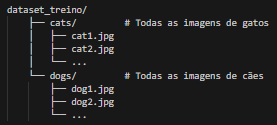


Quem estiver replicando o projeto deve garantir que os dados estejam organizados dessa maneira para evitar problemas com o carregamento e o pré-processamento das imagens.

In [23]:
# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [24]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory("train", 
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 25000 images belonging to 2 classes.


### **Construindo a Rede Neural Convolucional**

In [25]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Treinamento do Modelo**

In [26]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=5,
               epochs=25)

Epoch 1/25


c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4983 - loss: 0.8177
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5089 - loss: 0.6979
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6108 - loss: 0.6897
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.5980 - loss: 0.6836
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5025 - loss: 0.6959
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5105 - loss: 0.6929
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5564 - loss: 0.6923
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5765 - loss: 0.6927
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5251 - loss: 0.6918
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5477 - loss: 0.6885
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.6052 - loss: 0.6883
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6046 - loss: 0.6892
Epoc

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

### **Teste com uma Única Imagem**

Neste teste, utilizamos uma única imagem que o modelo ainda não viu para verificar a capacidade do modelo em classificar corretamente se a imagem é de um gato ou de um cachorro.

1. A imagem é carregada e redimensionada para o tamanho padrão utilizado no treinamento.
2. A imagem é convertida para um formato adequado para o modelo (um vetor de pixels).
3. O modelo faz a previsão com base no que aprendeu durante o treinamento.
4. Exibimos o resultado da previsão (gato ou cachorro) junto com a acurácia.

O objetivo deste teste é validar o comportamento do modelo com uma imagem isolada.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


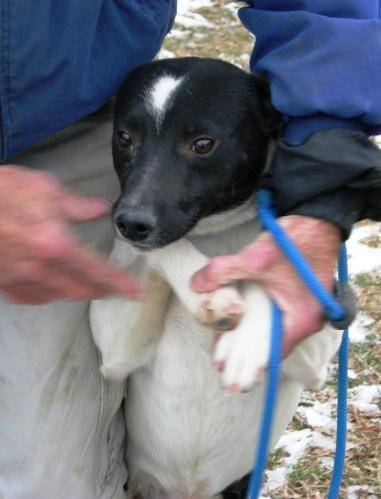

In [27]:
# Carregando a imagem de teste
test_image = image.load_img('test1\\1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='test1\\1.jpg')

**Resultado do Teste:** 

O modelo recebeu uma imagem de teste que nunca tinha visto antes. Ele conseguiu classificar a imagem como sendo de um gato ou cachorro com base nos dados que aprendeu durante o treinamento.
Este primeiro teste foi feito com uma única imagem para validação inicial do comportamento do modelo.

### **Teste com todo o dataset de teste**

Testando Imagens: 100%|██████████| 12500/12500 [17:49<00:00, 11.68it/s]
c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Acurácia: 14.58%
              precision    recall  f1-score   support

        Gato       1.00      0.15      0.25     12500
    Cachorro       0.00      0.00      0.00         0

    accuracy                           0.15     12500
   macro avg       0.50      0.07      0.13     12500
weighted avg       1.00      0.15      0.25     12500



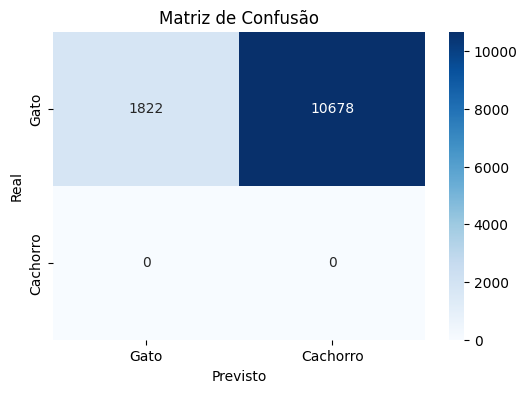

In [30]:
# Caminhos
pasta_teste = 'test1/'
caminho_csv = 'sampleSubmission.csv'

# Carregar labels reais
labels_df = pd.read_csv(caminho_csv)

# Listas para armazenar labels reais e previstos
y_true, y_pred = [], []

# Iterar sobre as imagens da pasta de teste com barra de progresso
for index, row in tqdm(labels_df.iterrows(), total=labels_df.shape[0], desc="Testando Imagens"):
    img_id = row['id']
    true_label = row['label']
    img_path = os.path.join(pasta_teste, f'{img_id}.jpg')

    # Carregar e pré-processar imagem
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = np.expand_dims(image.img_to_array(test_image), axis=0)
    
    # Previsão
    result = classifier.predict(test_image, verbose = False)
    pred_label = 1 if result[0][0] > 0.5 else 0
    
    # Armazenar os labels
    y_true.append(true_label)
    y_pred.append(pred_label)

# Calcular acurácia e exibir relatório
print(f'Acurácia: {accuracy_score(y_true, y_pred) * 100:.2f}%')
print(classification_report(y_true, y_pred, target_names=['Gato', 'Cachorro']))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gato', 'Cachorro'], yticklabels=['Gato', 'Cachorro'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

### **Testando novas melhorias:**

In [31]:
# Atualizando o redimensionamento e o tamanho do lote das imagens para 256x256
training_set = train_datagen.flow_from_directory(
    "train", 
    target_size=(256, 256), # de 64x64 para 256x256
    batch_size=64, # Aumentado de 32 para 64
    class_mode='binary'
)

Found 25000 images belonging to 2 classes.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Inicializando a Rede Neural Convolucional
classifier = Sequential()

# Adicionando a Primeira Camada de Convolução com Batch Normalization e Pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adicionando a Segunda Camada de Convolução com Batch Normalization e Pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adicionando a Terceira Camada de Convolução com 64 filtros, Batch Normalization e Pooling
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection com Dropout
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilando a rede com o otimizador RMSprop
classifier.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


As atualizações na arquitetura da rede neural têm os seguintes objetivos:

- **Aumentar a resolução das imagens de entrada**: Atualizar o `input_shape` para `(256, 256, 3)` permite que o modelo capture detalhes mais finos nas imagens, melhorando a capacidade de distinção entre gatos e cachorros.

- **Profundizar a rede com mais camadas convolucionais**: Adicionar uma terceira camada convolucional com 64 filtros possibilita a extração de características mais complexas e abstratas das imagens.

- **Acelerar e estabilizar o treinamento com Batch Normalization**: Incluir camadas de *Batch Normalization* após as camadas convolucionais normaliza as ativações, acelerando o treinamento e melhorando a estabilidade do modelo.

- **Prevenir overfitting com Dropout**: Adicionar uma camada de *Dropout* após a camada densa ajuda a evitar que o modelo se ajuste excessivamente aos dados de treinamento, melhorando a capacidade de generalização.

- **Melhorar a convergência com o otimizador RMSprop**: Utilizar o otimizador **RMSprop** com uma taxa de aprendizado de `0.0001` pode levar a uma convergência mais estável e eficiente durante o treinamento.

Essas atualizações visam aprimorar o desempenho, a eficiência e a robustez do modelo de classificação de imagens.

In [33]:
# Executando o treinamento com mais épocas
classifier.fit(
    training_set,
    steps_per_epoch=5,
    epochs=50  # Aumentado de 25 para 50 épocas
)

Epoch 1/50


c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4827 - loss: 3.9261
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5404 - loss: 1.1985
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5903 - loss: 0.8184
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6181 - loss: 0.7631
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6148 - loss: 0.7957
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5913 - loss: 0.8280
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6408 - loss: 0.8186
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6103 - loss: 0.7190
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5913 - loss: 0.7231
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6334 - loss: 0.6590
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5312 - loss: 0.7751
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6041 - loss: 0.7368
Epoch 13/50
5/5 ━━━━━━━━

Testando Imagens: 100%|██████████| 12500/12500 [20:11<00:00, 10.32it/s]
c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vitto\Desktop\Python LIA\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Acurácia: 48.36%
              precision    recall  f1-score   support

        Gato       1.00      0.48      0.65     12500
    Cachorro       0.00      0.00      0.00         0

    accuracy                           0.48     12500
   macro avg       0.50      0.24      0.33     12500
weighted avg       1.00      0.48      0.65     12500



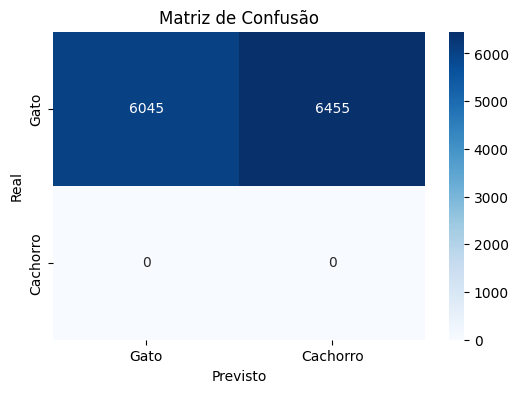

In [34]:
# Caminhos
pasta_teste = 'test1/'
caminho_csv = 'sampleSubmission.csv'

# Carregar labels reais
labels_df = pd.read_csv(caminho_csv)

# Listas para armazenar labels reais e previstos
y_true, y_pred = [], []

# Iterar sobre as imagens da pasta de teste com barra de progresso
for index, row in tqdm(labels_df.iterrows(), total=labels_df.shape[0], desc="Testando Imagens"):
    img_id = row['id']
    true_label = row['label']
    img_path = os.path.join(pasta_teste, f'{img_id}.jpg')

    # Carregar e pré-processar imagem
    test_image = image.load_img(img_path, target_size=(256, 256))  # Mudando o tamanho da imagem para 256x256
    test_image = np.expand_dims(image.img_to_array(test_image), axis=0)
    
    # Previsão
    result = classifier.predict(test_image, verbose = False)
    pred_label = 1 if result[0][0] > 0.5 else 0
    
    # Armazenar os labels
    y_true.append(true_label)
    y_pred.append(pred_label)

# Calcular acurácia e exibir relatório
print(f'Acurácia: {accuracy_score(y_true, y_pred) * 100:.2f}%')
print(classification_report(y_true, y_pred, target_names=['Gato', 'Cachorro']))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gato', 'Cachorro'], yticklabels=['Gato', 'Cachorro'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()